<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8 - CHUN SHING LEUNG**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The data set is Hotel booking demand from Kaggle.


https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/code


It contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay,the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


It is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. These hotels are located in Portugal, so the results only reflect the information on the Portugal Hotel Market.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import calendar
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/tonyCUNY/tonyCUNY/main/hotel_bookings.csv"

hotel = pd.read_csv(url)

# Summary statistics means, medians, quartiles
print(hotel.describe())

# Check if there are any missing values
print(hotel.isnull().sum())

# Any other relevant information about the dataset.
print(hotel.head())
print(hotel.shape)
print(hotel.duplicated().sum())
print(hotel.info())

# This dataset has 119390 rows and 32 columns
# It has has 31994 duplicate obervations
# Missing values are found in children, country, agent and company columns.
# Children has wrong datatype. It should be integer not float.


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [5]:
# Modify multiple column names.
hotel_2 = hotel.copy()
hotel_2 = hotel_2.rename(columns={'hotel': 'hotel_type', 'is_canceled': 'is_cancelled'})

# Fix missing and invalid values in data
# Drop column(s) from your dataset - agent, company
# Drop a row(s) from your dataset - drop rows contains missing
hotel_2.drop(['agent', 'company', 'adr'], axis=1, inplace=True)
hotel_3 = hotel_2.dropna(subset=['country', 'children'], axis=0)

# Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
# Children column should be int instead of float
hotel_3['children'] = hotel_3['children'].astype(int)

# Drop duplicated observations
hotel_3.drop_duplicates(inplace=True)

# Create new columns based on existing columns or calculations.
# Merge arrival_date_year, arrival_date_month, arrival_date_day_of_month column in to arrival_date
hotel_3['arrival_date_month'] = hotel_3['arrival_date_month'].apply(lambda x: list(calendar.month_name).index(x.title()))
hotel_3['arrival_date'] = hotel_3['arrival_date_year'].astype(str) + '-' + hotel_3['arrival_date_month'].astype(str) + '-' + hotel_3['arrival_date_day_of_month'].astype(str)

# drop the column arrival_date_week_number, arrival_date_day_of_month
hotel_3.drop(['arrival_date_week_number'], axis=1, inplace=True)
hotel_3.drop(['arrival_date_day_of_month'], axis=1, inplace=True)

# Merge children and babies into new column 'kids'. Children and babies can be considered as same observation.
# drop the children column
hotel_3['kids'] = hotel_3['children'] + hotel_3['babies']
hotel_3.drop(['children', 'babies'], axis=1, inplace=True)

# Merge stays_in_weekend_nights and stays_in_week_nights into new column 'total_nights'.
# drop the stays_in_weekend_nights, stays_in_week_nights column
hotel_3['total_nights'] = hotel_3['stays_in_weekend_nights'] + hotel_3['stays_in_week_nights']
hotel_3.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)

# Filter your data based on some condition.
# Only Adult can make a reservation, so any value under 'adult' equal 0 or less need to be filtered out
hotel_4 = hotel_3[hotel_3['adults'] > 0]

# Relocate the 'kids' column after the 'adults' column
# Relocate the 'total_nights' column after the 'arrival_date_month' column
# Relocate the 'arrival_date' column after the 'arrival_date_month' column
hotel_4.insert(hotel_4.columns.get_loc('adults') + 1, 'kids', hotel_4.pop('kids'))
hotel_4.insert(hotel_4.columns.get_loc('arrival_date_month') + 1, 'total_nights', hotel_4.pop('total_nights'))
hotel_4.insert(hotel_4.columns.get_loc('arrival_date_month') + 1, 'arrival_date', hotel_4.pop('arrival_date'))

# Convert all the string values to upper or lower cases in one column
hotel_4['hotel_type'] = hotel_4['hotel_type'].str.upper()

# Drop more column that are not useful to answer the questions
hotel_4.drop(['market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type'], axis=1, inplace=True)

# Sort your data based on multiple variables - arrival_date, adults
hotel_4 = hotel_4.sort_values(by=['arrival_date', 'adults'], ascending=[False, False])

# Check the result
print(hotel_4.head())
print(hotel_4.info())

# Group your dataset by country column, and get the mean, min, and max values by group.
result = hotel_4.groupby('country').agg({'total_nights': ['mean', 'min', 'max'], 'adults': ['mean', 'min', 'max']})
print(result)

# Group your dataset by country, hotel_type columns and then sort the aggregated results within the groups
result2 = hotel_4.groupby(['country', 'hotel_type']).agg({'total_nights': ['mean', 'min', 'max'], 'adults': ['mean', 'min', 'max']}).sort_values(by=['country', 'hotel_type'])
print(result2)

# How many percentage of reservations got cancelled?
canceled = hotel_4.groupby(['hotel_type', 'is_cancelled']).agg(count=('hotel_type', 'count'))
canceled['percentage'] = canceled['count'] / canceled.groupby('hotel_type')['count'].transform('sum')

# Total guest across year
hotel_4['total_guests'] = hotel_4['adults'] + hotel_4['kids']
total_gy = hotel_4.groupby(hotel_4['arrival_date_year']).agg(total_guests=('total_guests', 'sum'))

print(canceled)
print(total_gy)


          hotel_type  is_cancelled  lead_time  arrival_date_year  \
117921    CITY HOTEL             0         14               2017   
39231   RESORT HOTEL             0        174               2017   
39232   RESORT HOTEL             0        253               2017   
39315   RESORT HOTEL             0         59               2017   
39370   RESORT HOTEL             0        121               2017   

        arrival_date_month arrival_date  total_nights  adults  kids meal  ...  \
117921                   8     2017-8-9             3       4     0   BB  ...   
39231                    8     2017-8-9             3       3     0   BB  ...   
39232                    8     2017-8-9             3       3     1   BB  ...   
39315                    8     2017-8-9             5       3     0   BB  ...   
39370                    8     2017-8-9             7       3     0   HB  ...   

       is_repeated_guest  previous_cancellations  \
117921                 0                       0   


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



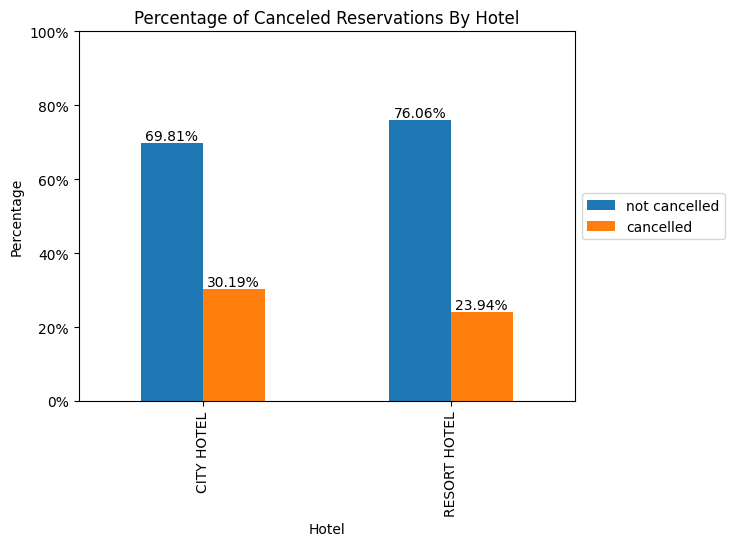

In [6]:
# Part 1 Multi Plots - subplot()
fig, ax = plt.subplots()
canceled.reset_index().pivot(index='hotel_type', columns='is_cancelled', values='percentage').plot(kind='bar', ax=ax)
ax.set_title('Percentage of Canceled Reservations By Hotel')
ax.set_xlabel('Hotel')
ax.set_ylabel('Percentage')
ax.set_ylim([0, 1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['not cancelled', 'cancelled'])
# Adding percentage value on the of each bar. The following code is based on:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# ax.containers represent the bars in plot. The for loop go through each rectangle in ax.containers
# ax.bar_label assign each rectangle a label. the for loop extract each rectangle value and format it as two decimal percentage value
# label_type is set to edge, which places the label at the top edge of the bar. It can be set to 'center' if we want the label to be
# at the center of the bar
for rect in ax.containers:
    ax.bar_label(rect, labels=[f'{x:.2%}' for x in rect.datavalues], label_type='edge')
plt.show()

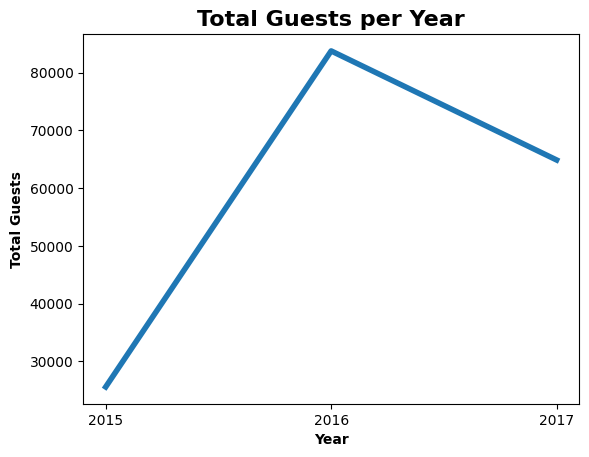

In [7]:
# Part 1 lineplot
plt.plot(total_gy.index, total_gy['total_guests'], linewidth=4)
plt.title('Total Guests per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Guests', fontweight='bold')
#plt.xticks turns x-axis label to be discrete
plt.xticks(total_gy.index)

plt.show()


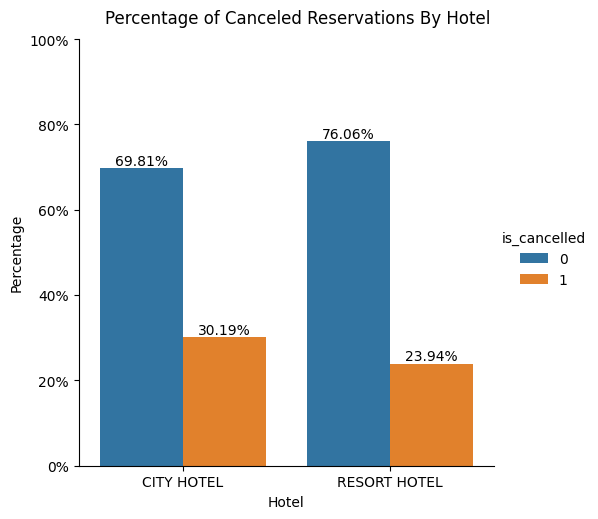

In [61]:
# Part 2: Recreate the visualizations above using the Seaborn library as best as possible.
canceled2 = canceled.reset_index()

g = sns.catplot(x='hotel_type',
            y='percentage',
            hue='is_cancelled',
            data=canceled2,
            kind='bar')
g.fig.suptitle('Percentage of Canceled Reservations By Hotel', y=1.03)
g.set(xlabel='Hotel',
      ylabel='Percentage')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylim(0, 1)
for i in g.ax.containers:
    g.ax.bar_label(i, labels=[f'{x:.2%}' for x in i.datavalues], label_type='edge')
plt.show()


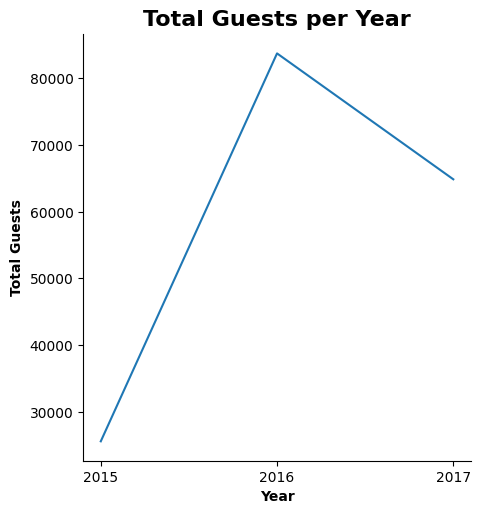

In [57]:
# Part 2: Recreate the visualizations above using the Seaborn library as best as possible.
total_gy2 = total_gy.reset_index()
total_gy2.head()

sns.relplot(x='arrival_date_year',
            y='total_guests',
            data=total_gy,
            kind='line')
plt.title('Total Guests per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Guests', fontweight='bold')
plt.xticks(total_gy2['arrival_date_year'])
plt.show()

# Part 3:
# In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.
# Seaborn won't let me to alternate the legend label. It just assign the value as label via the 'hue' part.
# Seaborn seems to be more straightforward.


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  